In [1]:
import pandas as pd
import numpy as np
import os
import neurokit2 as nk
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
import gc
from scipy import stats
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]  # Bigger images

In [3]:
data_full = pd.read_csv('full_empatica.csv')

In [4]:
participants = ['I8L4N6G7', 'M0R6U5F9', 'D0P7X9W6', 'M7D3F5K4', 
       'V9L0P2K7', 'U6O5V2T9', 'G9K4W1Z0', 'J6W7Q4H5', 'Z6A2W1E8', 'L0S1Z2I3', 'C1K4L9S8', 'X5Q0G4J2']

data_full = data_full.query('Participant in @participants')

In [5]:
data_full

,Unnamed: 0,miliseconds,EDA,EventLabel,Participant,time_iso,samplingFrequencyEDA,file_name,Participant_ID
0,0,10656.974,0.183283,Silence,I8L4N6G7,2025-05-20 10:09:16.784974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7
1,1,10906.974,0.181575,Silence,I8L4N6G7,2025-05-20 10:09:17.034974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7
2,2,11156.974,0.180707,Silence,I8L4N6G7,2025-05-20 10:09:17.284974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7
3,3,11406.974,0.180892,Silence,I8L4N6G7,2025-05-20 10:09:17.534974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7
4,4,11656.974,0.181561,Silence,I8L4N6G7,2025-05-20 10:09:17.784974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7
...,...,...,...,...,...,...,...,...,...
53817,53817,912083.518,6.533051,Silence,X5Q0G4J2,2025-05-27 09:06:29.191518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2
53818,53818,912333.518,6.528682,Silence,X5Q0G4J2,2025-05-27 09:06:29.441518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2
53819,53819,912583.518,6.526605,Silence,X5Q0G4J2,2025-05-27 09:06:29.691518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2
53820,53820,912833.518,6.523758,Silence,X5Q0G4J2,2025-05-27 09:06:29.941518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2


In [6]:
data_full.Participant.unique()

array(['I8L4N6G7', 'M0R6U5F9', 'D0P7X9W6', 'M7D3F5K4', 'V9L0P2K7',
       'U6O5V2T9', 'G9K4W1Z0', 'J6W7Q4H5', 'Z6A2W1E8', 'L0S1Z2I3',
       'C1K4L9S8', 'X5Q0G4J2'], dtype=object)

In [7]:
folder_path = '/Users/annapalatkina/Desktop/drive/Embrace Plus/filtered_marimo'
filtered_eda = []
for participant in data_full.Participant.unique():
    file_path = os.path.join(folder_path, participant+'.csv')  
    data = pd.read_csv(file_path)
    #print(participant, len(data), len(df))
    filtered_eda.extend(data.Filtered)

data_full['Filtered_EDA'] = filtered_eda

In [8]:
data_full

,Unnamed: 0,miliseconds,EDA,EventLabel,Participant,time_iso,samplingFrequencyEDA,file_name,Participant_ID,Filtered_EDA
0,0,10656.974,0.183283,Silence,I8L4N6G7,2025-05-20 10:09:16.784974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7,0.148741
1,1,10906.974,0.181575,Silence,I8L4N6G7,2025-05-20 10:09:17.034974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7,0.162714
2,2,11156.974,0.180707,Silence,I8L4N6G7,2025-05-20 10:09:17.284974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7,0.110094
3,3,11406.974,0.180892,Silence,I8L4N6G7,2025-05-20 10:09:17.534974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7,0.115156
4,4,11656.974,0.181561,Silence,I8L4N6G7,2025-05-20 10:09:17.784974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7,0.083183
...,...,...,...,...,...,...,...,...,...,...
53817,53817,912083.518,6.533051,Silence,X5Q0G4J2,2025-05-27 09:06:29.191518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2,-0.029169
53818,53818,912333.518,6.528682,Silence,X5Q0G4J2,2025-05-27 09:06:29.441518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2,-0.028567
53819,53819,912583.518,6.526605,Silence,X5Q0G4J2,2025-05-27 09:06:29.691518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2,-0.026887
53820,53820,912833.518,6.523758,Silence,X5Q0G4J2,2025-05-27 09:06:29.941518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2,-0.025091


In [10]:
data_full.drop(columns=['EDA'], inplace=True)

In [11]:
data_full.rename(columns={'Filtered_EDA':'EDA'}, inplace=True)

In [12]:
data_full

,Unnamed: 0,miliseconds,EventLabel,Participant,time_iso,samplingFrequencyEDA,file_name,Participant_ID,EDA
0,0,10656.974,Silence,I8L4N6G7,2025-05-20 10:09:16.784974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7,0.148741
1,1,10906.974,Silence,I8L4N6G7,2025-05-20 10:09:17.034974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7,0.162714
2,2,11156.974,Silence,I8L4N6G7,2025-05-20 10:09:17.284974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7,0.110094
3,3,11406.974,Silence,I8L4N6G7,2025-05-20 10:09:17.534974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7,0.115156
4,4,11656.974,Silence,I8L4N6G7,2025-05-20 10:09:17.784974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7,0.083183
...,...,...,...,...,...,...,...,...,...
53817,53817,912083.518,Silence,X5Q0G4J2,2025-05-27 09:06:29.191518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2,-0.029169
53818,53818,912333.518,Silence,X5Q0G4J2,2025-05-27 09:06:29.441518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2,-0.028567
53819,53819,912583.518,Silence,X5Q0G4J2,2025-05-27 09:06:29.691518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2,-0.026887
53820,53820,912833.518,Silence,X5Q0G4J2,2025-05-27 09:06:29.941518,4.000354,1-1-X5Q0G4J2_1748335476.avro,1-1-X5Q0G4J2,-0.025091


In [13]:
mask_silence = (data_full["EventLabel"] == "Silence")
mask_negative = (data_full["EventLabel"] == "IntenseAudio")
mask_positive = (data_full["EventLabel"] == "CalmAudio")
mask_music = (data_full["EventLabel"] == "InterimAudio")

positives = data_full[mask_positive]
negatives = data_full[mask_negative]
baselines = data_full[mask_silence]

In [14]:
def extract_eda_info(df):
    n_peaks = []
    ampl_peaks = []
    participants = []

    for participant, data in df.groupby(by='Participant'):
        #sampling_rate = data.samplingFrequencyEDA.iloc[0]
        sampling_rate = 4
        signal, _= nk.eda_process(data.EDA, sampling_rate=sampling_rate)
        n_peaks.append(sum(signal.SCR_Peaks))
        ampl_peaks.append(np.mean(signal.query('SCR_Peaks ==1').SCR_Amplitude))
        participants.append(participant)

    return n_peaks,  ampl_peaks, participants 

n_peaks_pos, ampl_peaks_pos, participants = extract_eda_info(positives)
n_peaks_neg, ampl_peaks_neg, participants = extract_eda_info(negatives)
n_peaks_bas, ampl_peaks_bas, participants = extract_eda_info(baselines)

/Users/annapalatkina/Desktop/drive/.venv/lib/python3.10/site-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(
/Users/annapalatkina/Desktop/drive/.venv/lib/python3.10/site-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(
/Users/annapalatkina/Desktop/drive/.venv/lib/python3.10/site-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(
/Users/annapalatkina/Desktop/drive/.venv/lib/python3.10/site-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(
/Users/annapalatkina/Desktop/drive/.venv/lib/python3.10/site-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(
/Users/annapalatkina/Desktop/drive/.venv

In [17]:
participants[4]
sampling_rate = 4
signal, _= nk.eda_process(data_full.query('Participant == "J6W7Q4H5"').EDA, sampling_rate=sampling_rate)
signal

/Users/annapalatkina/Desktop/drive/.venv/lib/python3.10/site-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(


,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,0.048203,0.048203,0.045441,0.002762,0,0,0.000000,0.000000,0.00,0,0.0
1,0.052857,0.052857,0.043452,0.009405,0,1,0.009405,NaN,NaN,0,0.0
2,0.036057,0.036057,0.041456,-0.005399,1,0,0.000000,0.000000,0.00,0,0.0
3,0.038842,0.038842,0.039459,-0.000617,0,1,-0.000617,0.004782,0.25,0,0.0
4,0.027964,0.027964,0.037469,-0.009505,1,0,0.000000,0.000000,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3595,0.000160,0.000160,0.000184,0.000106,0,0,0.000000,0.000000,0.00,0,0.0
3596,-0.000942,-0.000942,0.000179,-0.000986,0,0,0.000000,0.000000,0.00,0,0.0
3597,-0.000030,-0.000030,0.000175,-0.000066,0,0,0.000000,0.000000,0.00,0,0.0
3598,-0.000157,-0.000157,0.000172,-0.000185,0,0,0.000000,0.000000,0.00,0,0.0


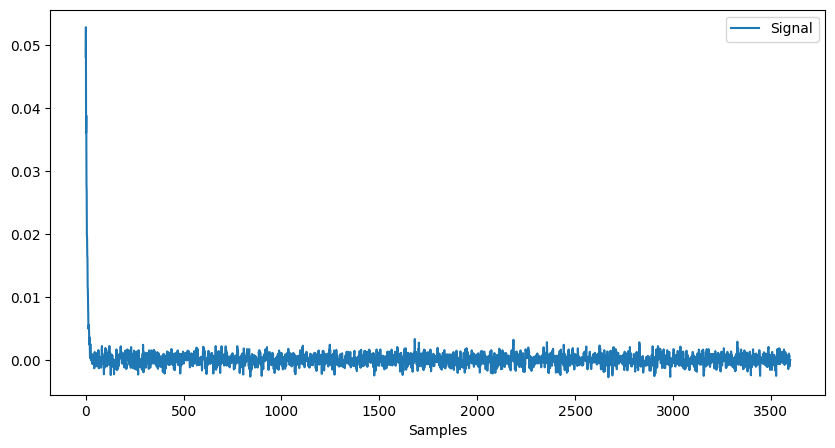

In [19]:
nk.signal_plot(signal.EDA_Clean)

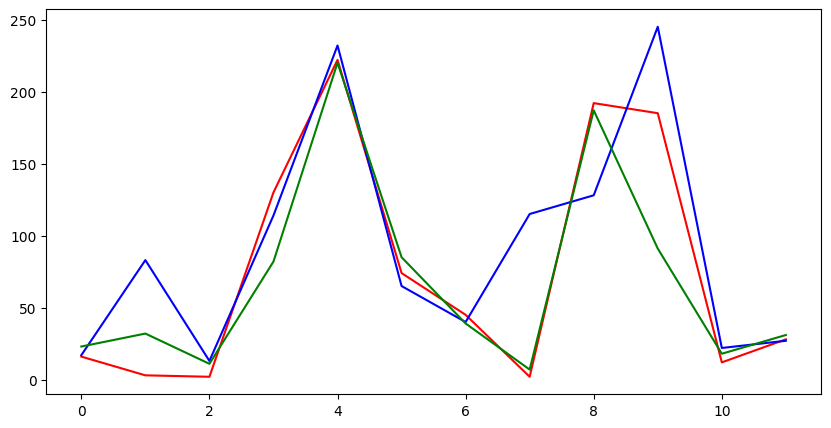

In [15]:
plt.plot(n_peaks_pos, 'r') # plotting t, a separately 
plt.plot(n_peaks_neg, 'b') # plotting t, b separately 
plt.plot(n_peaks_bas, 'g') # plotting t, c separately 
plt.show()

In [ ]:
# CHECK IF THESE PEAKS == MOS score for the same participants